In [58]:
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

Import Dataset to pandas dataframe

In [59]:
df_2018 = pd.read_csv('../data/raw/top2018.csv')
df_2019 = pd.read_csv('../data/raw/top50.csv',encoding='ISO-8859-1')
df_2018.head()
df_2019.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


# Change column names of df_2019 to match with that of df_2018
From the table above we can find that the common columns in both dataframe have different names. In this step we will match the name of the columns in both dataframe

In [60]:
df_2019.rename ( columns = {'Unnamed: 0' : 'id',
                            'Track.Name' : 'name',
                            'Artist.Name' : 'artists',
                            'Danceability' : 'danceability',
                            'Energy' : 'energy',
                            'Loudness..dB..' : 'loudness',
                            'Liveness' : 'liveness',
                            'Valence.' : 'valence',
                            'Speechiness.' : 'speechiness',
                            'Length.' : 'duration_ms',
                            'Acousticness..' : 'acousticness'
    
}, inplace = True
)


In [61]:
#convert features to match in both table
df_2019['duration_ms'] *= 1000
df_2019['energy'] *= 0.01
df_2019['danceability'] *= 0.01
df_2019['loudness'] *= 0.01
df_2019['liveness'] *= 0.01
df_2019['valence'] *= 0.01
df_2019['acousticness'] *= 0.01
df_2019['speechiness'] *= 0.01
df_2019.head()

,id,name,artists,Genre,Beats.Per.Minute,energy,danceability,loudness,liveness,valence,duration_ms,acousticness,speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,0.55,0.76,-0.06,0.08,0.75,191000,0.04,0.03,79
1,2,China,Anuel AA,reggaeton flow,105,0.81,0.79,-0.04,0.08,0.61,302000,0.08,0.09,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,0.80,0.40,-0.04,0.16,0.70,186000,0.12,0.46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,0.65,0.64,-0.08,0.08,0.55,198000,0.12,0.19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,0.65,0.58,-0.04,0.11,0.18,175000,0.45,0.07,94


# Combine and remove unwanted columns
I will combine both dataframe into single and remove unwanted columns, i.e. columns which has data from any of one dataframe. eg., Genre, Beats.Per.Minute etc.

In [62]:
#df_2018 is top 100 songs while df_2019 is top 50 songs. 
# So, select top 50 songs from df_2018 before concatenating.
df_2018 = df_2018.iloc[:-50]

#Add column year in both dataframe with value 2018 and 2019
df_2018['year'] = 2018
df_2019['year'] = 2019

df = pd.concat ([df_2018, df_2019], ignore_index = False)


In [63]:
#remove columns with NaN
df = df.dropna (axis ='columns')
df.head()
df.describe()
df.to_csv('../data/processed/topsongs18_19.csv', index = False)

,id,name,artists,danceability,energy,loudness,speechiness,acousticness,liveness,valence,duration_ms,year
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,-9.211,0.1090,0.0332,0.552,0.357,198973.0,2018
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,-4.880,0.1450,0.2580,0.123,0.473,166606.0,2018
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,-6.090,0.0898,0.1170,0.131,0.140,218147.0,2018
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,-8.011,0.1170,0.5800,0.112,0.439,221440.0,2018
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,-5.833,0.1250,0.0589,0.396,0.350,217925.0,2018


,danceability,energy,loudness,speechiness,acousticness,liveness,valence,duration_ms,year
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.71392,0.658130,-2.749520,0.118548,0.206888,0.167719,0.510546,205011.230000,2018.500000
std,0.11329,0.140737,2.968423,0.107071,0.197101,0.126988,0.217192,42914.825703,0.502519
min,0.29000,0.308000,-10.068000,0.023200,0.001040,0.021500,0.079600,115000.000000,2018.000000
25%,0.65025,0.559750,-5.169250,0.049650,0.050000,0.090000,0.350000,181197.250000,2018.000000
50%,0.72800,0.680000,-1.247000,0.073450,0.141000,0.120000,0.504000,204209.000000,2018.500000
75%,0.79100,0.774500,-0.060000,0.133750,0.306000,0.174750,0.672500,221739.750000,2019.000000
max,0.92200,0.909000,-0.020000,0.516000,0.883000,0.636000,0.950000,417920.000000,2019.000000


 # Bar plot of artist vs number of songs

Text(0.5, 0, 'artists')

Text(0, 0.5, 'number of songs')

Text(0.5, 1.0, 'artist vs number of songs')

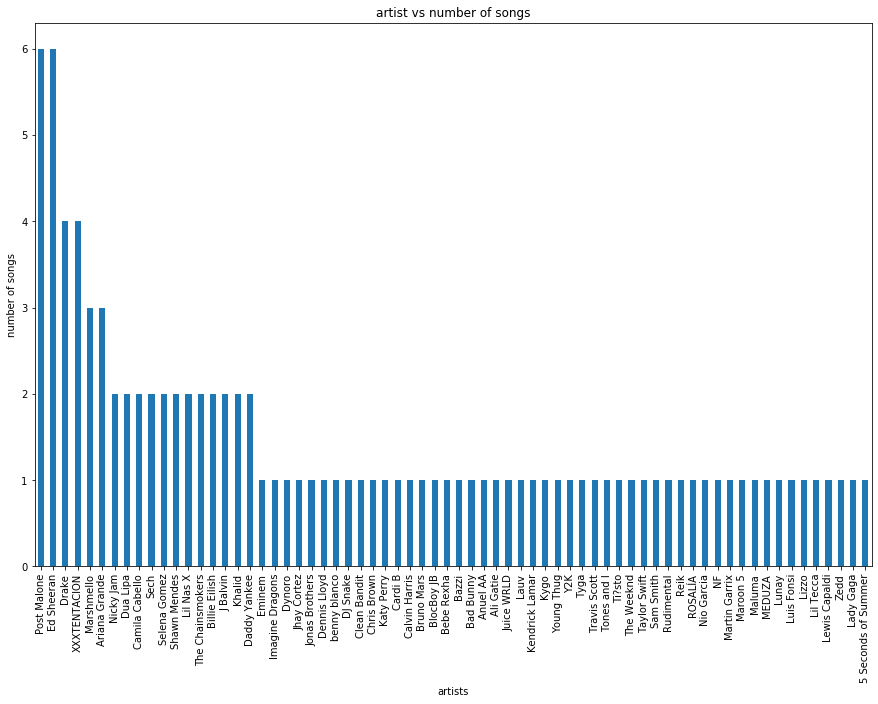

In [64]:
figure = plt.figure(figsize =(15,10))
df.groupby('artists')['name'].agg(len).sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel("artists")
plt.ylabel("number of songs")
plt.title("artist vs number of songs")

- From this plot we can find out that Ed Sheeran and Post Malone were the top artist to be in top 50 (combined year 2018 and 2019).

In [65]:
#Function to plot histogram
def plot_histogram(dataframe, column):
    dataframe.hist(column)

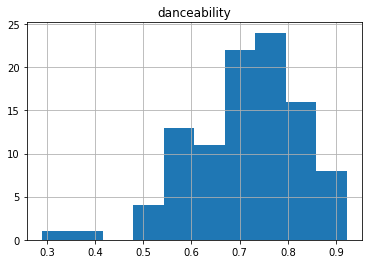

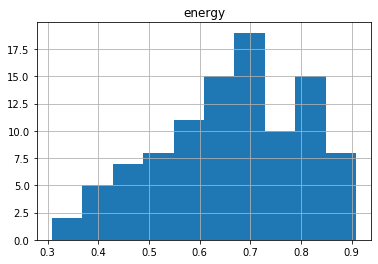

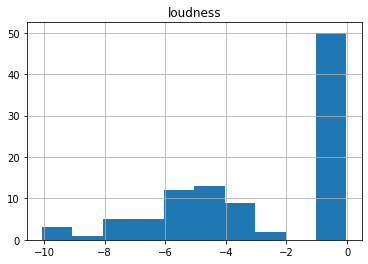

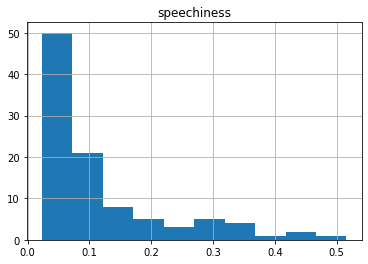

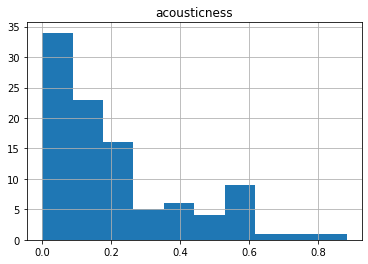

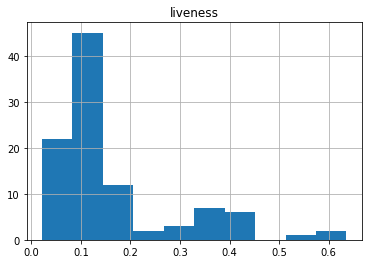

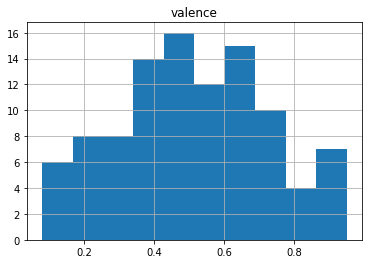

In [66]:
columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence']
for i in columns:
    plot_histogram(df, i)

From the data source:
- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
- speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

From these histograms we can conlude few points.
- There were few songs that were not energetic and danceable.
- Few songs were recorded live.
- Few Songs were acoustic, loud and included speech.
